<a href="https://colab.research.google.com/github/NikhithaPatibandla/SalesAndProductionPrediction/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Train_Data.csv to Train_Data (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Test.csv to Test (1).csv


In [ ]:
train_df = pd.read_csv('Train_Data.csv')
train_df = pd.DataFrame(train_df)
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.809200,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.269200,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.618000,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.095000,OUT010,1998,Medium,Tier 3,Grocery Store,732.380000
4,NCD19,8.930000,Low Fat,0.000000,Household,53.861400,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
100691,FDF57,12.820386,Regular,0.058499,Fruits and Vegetables,168.591857,OUT027,1985,Medium,Tier 3,Supermarket Type3,3409.170702
100692,FDX48,17.792089,Regular,0.038086,Baking Goods,154.329250,OUT018,2009,Medium,Tier 3,Supermarket Type2,3398.368288
100693,NCL31,7.371963,LF,0.120385,Others,145.190862,OUT049,1999,Medium,Tier 1,Supermarket Type1,5297.403989
100694,FDT09,12.827785,Regular,0.021533,Snack Foods,130.945703,OUT019,1985,Small,Tier 1,Grocery Store,131.682185


In [ ]:
test_df = pd.read_csv('Test.csv')
test_df = pd.DataFrame(test_df)
test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [ ]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,100696.000000,100696.000000,100696.000000,100696.000000,100696.000000
mean,12.844659,0.066101,141.055486,1997.783209,2185.106732
std,4.211508,0.051513,62.207778,8.386049,1711.549429
min,4.506201,-0.000100,31.199045,1985.000000,32.454909
25%,9.346204,0.027033,93.712000,1987.000000,834.662463
50%,12.853257,0.053835,143.146365,1999.000000,1796.972477
75%,16.000000,0.094706,185.755172,2004.000000,3103.959286
max,21.397178,0.328477,266.977456,2009.000000,13087.940350


In [ ]:
train_df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
y_train = train_df['Item_Outlet_Sales']

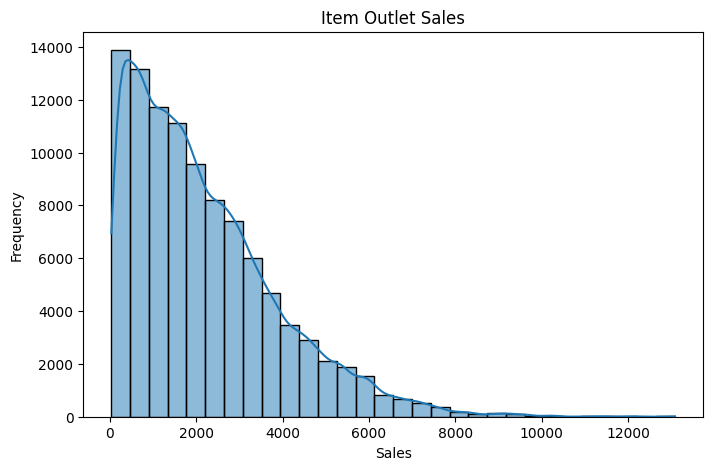

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(y_train,bins = 30,kde = True)
plt.title('Item Outlet Sales')
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

In [ ]:
corr_matrix = train_df.corr(numeric_only=True)

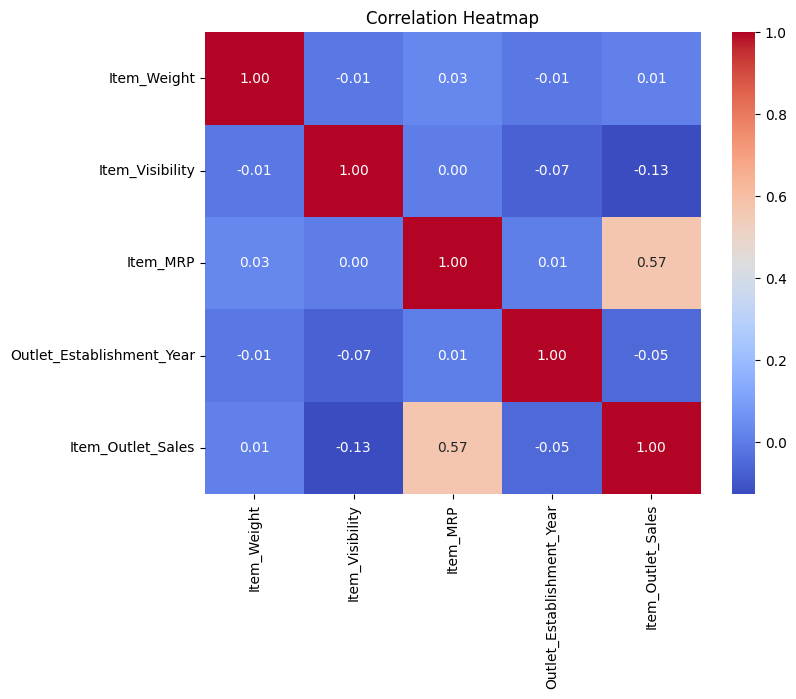

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
train_encoded = train_df.copy()

In [ ]:
label_encoders = {}
categorical_columns = ["Item_Fat_Content", "Item_Type", "Outlet_Identifier",
                        "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]
for col in categorical_columns:
    le = LabelEncoder()
    train_encoded[col] = le.fit_transform(train_encoded[col])
    label_encoders[col] = le

print(train_encoded.head())


   Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0             9.30         9.30                 1         0.016047          4   
1             5.92         5.92                 2         0.019278         14   
2            17.50        17.50                 1         0.016760         10   
3            19.20        19.20                 2         0.000000          6   
4             8.93         8.93                 1         0.000000          9   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092                  9                       1999            1   
1   48.2692                  3                       2009            1   
2  141.6180                  9                       1999            1   
3  182.0950                  0                       1998            1   
4   53.8614                  1                       1987            0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  Outlet_Age 

In [ ]:
scaler = MinMaxScaler()
columns_to_normalize = categorical_columns + ["Item_Weight", "Item_Visibility", "Item_MRP",
                                              "Outlet_Establishment_Year", "Item_Outlet_Sales","Outlet_Age"]
train_encoded[columns_to_normalize] = scaler.fit_transform(train_encoded[columns_to_normalize])
print(train_encoded.head())

   Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0             9.30     0.283808              0.25         0.049143   0.266667   
1             5.92     0.083701              0.50         0.058976   0.933333   
2            17.50     0.769275              0.25         0.051312   0.666667   
3            19.20     0.869920              0.50         0.000304   0.400000   
4             8.93     0.261903              0.25         0.000304   0.600000   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  0.927185           1.000000                   0.583333          0.5   
1  0.072399           0.333333                   1.000000          0.5   
2  0.468317           1.000000                   0.583333          0.5   
3  0.639991           0.000000                   0.541667          0.5   
4  0.096117           0.111111                   0.083333          0.0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  Outlet_Age 

In [ ]:
train_df['Outlet_Age'] = 2025 - train_df['Outlet_Establishment_Year']

In [ ]:
train_df['Item_Identifier'] = train_df.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = LinearRegression()
model.fit(train_encoded, y_train)

LinearRegression()

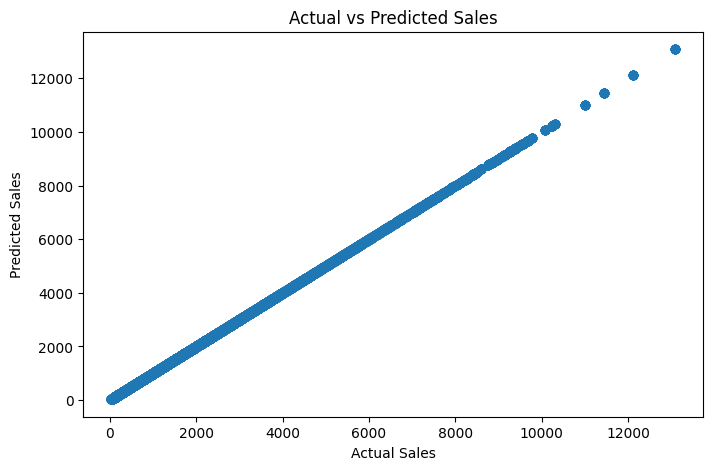

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_train, model.predict(train_encoded))
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error

In [ ]:
r2_score(y_train,model.predict(train_encoded))

1.0

In [ ]:
mean_squared_error(y_train,model.predict(train_encoded))

5.193814928747548e-24

In [ ]:
root_mean_squared_error(y_train,model.predict(train_encoded))

2.278994280104175e-12

In [ ]:
model2 = DecisionTreeRegressor()
model2.fit(train_encoded,y_train)

DecisionTreeRegressor()

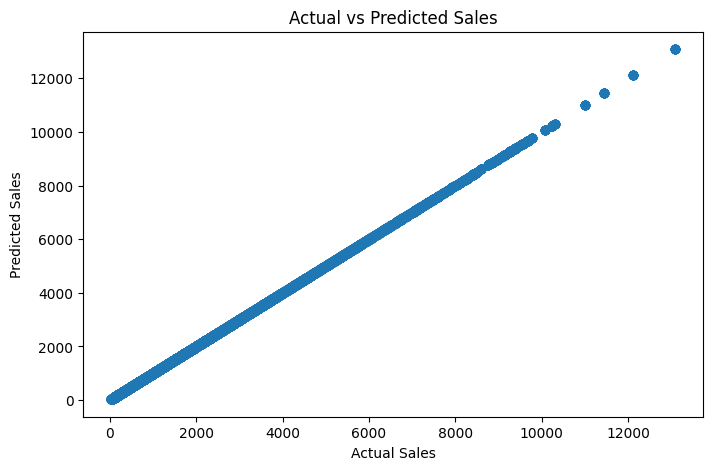

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_train, model.predict(train_encoded))
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [ ]:
r2_score(y_train,model2.predict(train_encoded))

1.0

In [ ]:
mean_squared_error(y_train,model2.predict(train_encoded))

2.056329526621645e-12

In [ ]:
root_mean_squared_error(y_train,model2.predict(train_encoded))

1.4339907693641702e-06

In [ ]:
model3 = RandomForestRegressor()
model3.fit(train_encoded,y_train)

RandomForestRegressor()

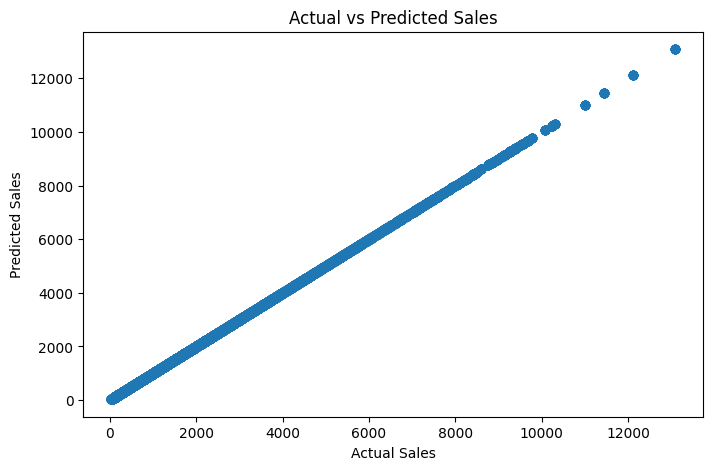

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_train, model.predict(train_encoded))
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [ ]:
r2_score(y_train,model3.predict(train_encoded))

0.9999999996339415

In [ ]:
mean_squared_error(y_train,model3.predict(train_encoded))

0.001072321551973624

In [ ]:
root_mean_squared_error(y_train,model3.predict(train_encoded))

0.03274632119755781

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=model3,param_grid = param_grid, cv=5, scoring='neg_mean_squared_error',n_jobs=-1,verbose=2)
grid_search.fit(train_encoded, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
